In [20]:
import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt

1.2.840.10008.5.1.4.1.1.20
(128, 128)


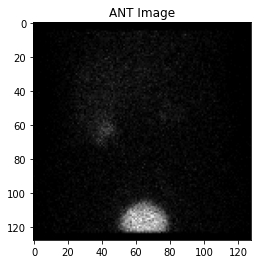

In [21]:
################ TASK B ####################

### ANT IMAGE ###

# Load the DICOM file
dicom_file = pydicom.dcmread('drsprg_114_ANT.dcm')

# Extract the image from the DICOM file
image = dicom_file.pixel_array[128]
image=image.astype(np.uint8)
print(dicom_file.SOPClassUID)

# Check the shape of the image array
print(np.shape(image))

# Display the image using Matplotlib
if len(np.shape(image)) == 2:
    plt.imshow(image,cmap=plt.cm.gray )
    plt.title('ANT Image') 
    plt.show()

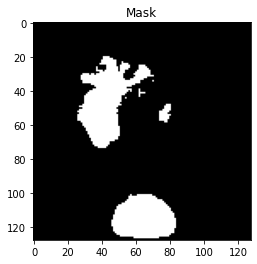

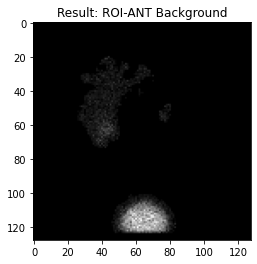

In [22]:
## ANT BACKGROUND ##

import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import adjust_gamma
import skimage.color
import skimage.filters

# Increase the contrast of the original image
gamma=1.25
image_contrast = adjust_gamma(image, gamma)

# Pre-process the image
image_gauss = cv2.GaussianBlur(image_contrast, (7, 7), cv2.BORDER_DEFAULT)

#create mask based on the threshold
t=0.9
binary_mask=image_gauss>t
fig,ax=plt.subplots()
plt.imshow(binary_mask,cmap="gray")
plt.title('Mask')

# Apply the mask to the original image
selection=image.copy()
selection[~binary_mask]=0
fig,ax=plt.subplots()
plt.imshow(selection, cmap="gray")
plt.title('Result: ROI-ANT Background')
plt.savefig('outputANT-bg.png',dpi=100)

C:\Users\User\AppData\Local\Temp\ipykernel_9548\1028087734.py:28: UserWarning: No contour levels were found within the data range.
  plt.contour(result, [0,5])


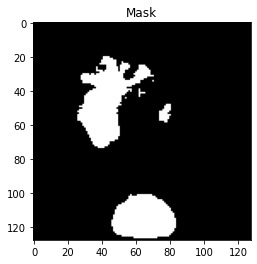

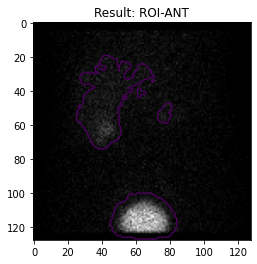

In [23]:
### ANT-ROI ###

import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import adjust_gamma
import skimage.color
import skimage.filters
from skimage import segmentation

gamma=1.28
image_contrast = adjust_gamma(image, gamma)
image_gauss = cv2.GaussianBlur(image_contrast, (7, 7), cv2.BORDER_DEFAULT)

t1=0.8
mask=image_gauss>t1
clean_border=segmentation.clear_border(mask)
plt.figure()
plt.imshow(clean_border,cmap="gray" )
plt.title('Mask')

result=clean_border.copy()
result[~mask]=0
plt.figure()
plt.imshow(image,cmap="gray" )
plt.title('Result: ROI-ANT')
plt.contour(result, [0,5])
plt.savefig('outputANT-roi.png',dpi=100)

1.2.840.10008.5.1.4.1.1.20
(128, 128)


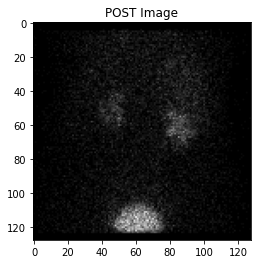

In [24]:
################ TASK B ####################

###  POST IMAGE ###

# Load the DICOM file
dicom_file = pydicom.dcmread('drsprg_114_POST.dcm')

# Extract the image from the DICOM file
imageP = dicom_file.pixel_array[128]
imageP=imageP.astype(np.uint8)
print(dicom_file.SOPClassUID)

# Check the shape of the image array
print(np.shape(imageP))

# Display the image using Matplotlib
if len(np.shape(imageP)) == 2:
    plt.imshow(imageP,cmap=plt.cm.gray )
    plt.title('POST Image')  # Add a title
    plt.savefig('outputPOST.png',dpi=100)
    plt.show()

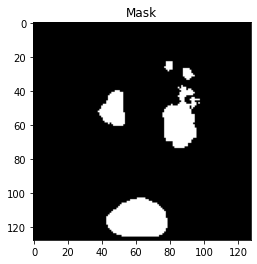

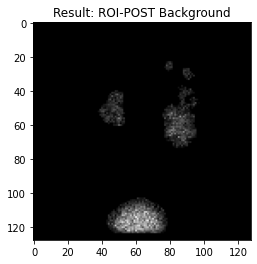

In [25]:
## POST BACKGROUND ##

import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import adjust_gamma
import skimage.color
import skimage.filters

# Increase the contrast of the original image
gamma=1.27 
image_contrast = adjust_gamma(imageP, gamma)

# Pre-process the image
image_gauss = cv2.GaussianBlur(image_contrast, (7, 7), cv2.BORDER_DEFAULT)

#create mask based on the threshold
t=0.8
binary_mask=image_gauss>t
fig,ax=plt.subplots()
plt.imshow(binary_mask,cmap="gray")
plt.title('Mask')

# Apply the mask to the original image
selection=imageP.copy()
selection[~binary_mask]=0
fig,ax=plt.subplots()
plt.imshow(selection, cmap="gray")
plt.title('Result: ROI-POST Background')
plt.savefig('outputPOST-bg.png',dpi=100)

C:\Users\User\AppData\Local\Temp\ipykernel_9548\211937292.py:28: UserWarning: No contour levels were found within the data range.
  plt.contour(result, [0,5])


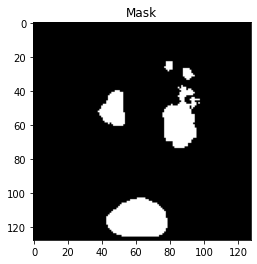

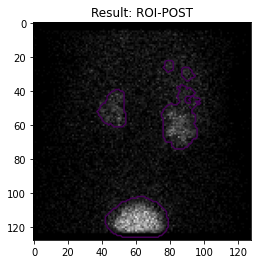

In [26]:
### POST-ROI ###

import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import adjust_gamma
import skimage.color
import skimage.filters
from skimage import segmentation

gamma=1.27
image_contrast = adjust_gamma(imageP, gamma)
image_gauss = cv2.GaussianBlur(image_contrast, (7, 7), cv2.BORDER_DEFAULT)

t1=0.8
mask=image_gauss>t1
clean_border=segmentation.clear_border(mask)
plt.figure()
plt.imshow(clean_border,cmap="gray" )
plt.title('Mask')

result=clean_border.copy()
result[~mask]=0
plt.figure()
plt.imshow(imageP,cmap="gray" )
plt.title('Result: ROI-POST')
plt.contour(result, [0,5])
plt.savefig('outputPOST-roi.png',dpi=100)